Lectura del archivo y normalizacion de titulos (headers)

In [2]:
import pandas as pd
import unicodedata
archivo = "../data/Sales report completa.xlsx"
df = pd.read_excel(archivo, sheet_name="Ventas Supermercado")

def normalizar_columna (nombre):
    nombre = unicodedata.normalize('NFKD', nombre) .encode('ascii', 'ignore').decode('ASCII' , "ignore")
    nombre = nombre.lower() .replace(" ", "_") .replace("-", "_") .replace(".", "_")
    return nombre

df.columns = [normalizar_columna(col) for col in df.columns]

print("Columnas normalizadas:")
print(df.columns.tolist())


Columnas normalizadas:
['numero_venta', 'mes_salida', 'dia_salida', 'ano_salida', 'mes_entrega', 'dia_entrega', 'ano_entrega', 'metodo_envio', 'numero_cliente', 'nombre_cliente', 'segmento', 'ciudad', 'estado', 'pais', 'id_producto', 'ventas', 'cantidad', 'descuento', 'utilidad', 'costo_envio', 'prioridad_envio']


Reajuste del codigo para depurar posibles inconsistencias en el formato de la fecha

In [ ]:
# Usar tipo Int64 que permite NaN
for col in ['ano_salida', 'mes_salida', 'dia_salida', 'ano_entrega', 'mes_entrega', 'dia_entrega']:
    df[col] = df[col].astype('Int64')

# Crear fechas con errores coercibles como NaT
df['fecha_salida'] = pd.to_datetime(
    df[['ano_salida', 'mes_salida', 'dia_salida']].rename(
        columns={'ano_salida': 'year', 'mes_salida': 'month', 'dia_salida': 'day'}
    ), errors='coerce'
)

df['fecha_entrega'] = pd.to_datetime(
    df[['ano_entrega', 'mes_entrega', 'dia_entrega']].rename(
        columns={'ano_entrega': 'year', 'mes_entrega': 'month', 'dia_entrega': 'day'}
    ), errors='coerce'
)
print(df[['fecha_salida', 'fecha_entrega']].head())




  fecha_salida fecha_entrega
0   2011-01-01    2011-01-06
1   2011-01-01    2011-01-08
2   2011-01-01    2011-01-05
3   2011-01-01    2011-01-05
4   2011-01-01    2011-01-08


,numero_venta,mes_salida,dia_salida,ano_salida,mes_entrega,dia_entrega,ano_entrega,metodo_envio,numero_cliente,nombre_cliente,...,pais,id_producto,ventas,cantidad,descuento,utilidad,costo_envio,prioridad_envio,fecha_salida,fecha_entrega


Muestra la cantidad de veces que aparece un producto (mas vendido)

In [5]:
ventas_por_producto = df['id_producto'].value_counts()
print(ventas_por_producto)

id_producto
OFF-AR-10003651    35
OFF-AR-10003829    31
OFF-BI-10002799    30
OFF-BI-10003708    30
FUR-CH-10003354    28
                   ..
FUR-BO-10001524     1
TEC-MA-10001841     1
FUR-FU-10000067     1
OFF-EN-10000872     1
OFF-AR-10001129     1
Name: count, Length: 10292, dtype: int64


Cuenta las veces que aparece un cliente

In [6]:
frecuencia_cliente = df['nombre_cliente'].value_counts()
print(frecuencia_cliente)

nombre_cliente
Muhammed Yedwab    108
Steven Ward        106
Gary Hwang         102
Patrick O'Brill    102
Bill Eplett        102
                  ... 
Andy Reiter         35
David Bremer        34
Nicole Brennan      31
Darren Budd         31
Michael Oakman      29
Name: count, Length: 795, dtype: int64


Tendencia de ventas en el tiempo

<Axes: title={'center': 'Ventas totales por día'}, xlabel='fecha_salida'>

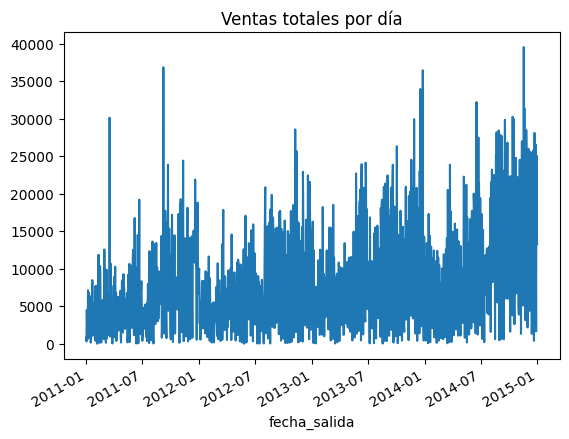

In [6]:
df.groupby('fecha_salida')['ventas'].sum().plot(title='Ventas totales por día')


Analisis geografico (calculo)

In [7]:
ventas_por_ciudad = df.groupby('ciudad')['ventas'].sum().sort_values(ascending=False)
ventas_por_estado = df.groupby('estado')['ventas'].sum().sort_values(ascending=False)
ventas_por_pais = df.groupby('pais')['ventas'].sum().sort_values(ascending=False)


In [8]:
print(ventas_por_ciudad.head(10))  # Las top 10
print(ventas_por_ciudad.tail(10))  # Las últimas 10


ciudad
New York City    256368.16100
Los Angeles      175851.34100
Manila           120886.94850
Seattle          119540.74200
San Francisco    112669.09200
Philadelphia     109077.01300
Sydney           101945.51700
Jakarta           94321.32420
London            86945.80500
Mexico City       85728.55176
Name: ventas, dtype: float64
ciudad
Springdale         4.300
San Luis Obispo    3.620
Fort Portal        3.573
Victoria Falls     3.465
Ormond Beach       2.808
Felahiye           2.808
Pensacola          2.214
Jupiter            2.064
Elyria             1.824
Abilene            1.392
Name: ventas, dtype: float64


Mayor ingreso por segmentacion

In [9]:
df['segmento'].value_counts()


segmento
Consumer       26518
Corporate      15429
Home Office     9343
Name: count, dtype: int64

Calcular el tiempo de entrega

In [10]:
df['tiempo_entrega'] = (df['fecha_entrega'] - df['fecha_salida']).dt.days


Promedio tiempo de entrega (terminos estadisticos)

In [11]:
print(df['tiempo_entrega'].describe())


count    51290.000000
mean         3.969370
std          1.729437
min          0.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          7.000000
Name: tiempo_entrega, dtype: float64


Tiempo de entrega (los paises se estan mostrando?)

In [12]:
df.groupby('pais')['tiempo_entrega'].mean().sort_values(ascending=False).head(10)
df.groupby('estado')['tiempo_entrega'].mean().sort_values(ascending=False).head(10)


estado
Karaman      7.000000
Jizzakh      7.000000
Lima         7.000000
Tokat        7.000000
Ar Raqqah    7.000000
Catamarca    7.000000
Cojedes      7.000000
Saga         7.000000
Yaracuy      7.000000
Lucerne      6.333333
Name: tiempo_entrega, dtype: float64

Analisis de utilidad de producto

In [13]:
utilidad_por_producto = df.groupby('id_producto')['utilidad'].sum().sort_values(ascending=False)


In [14]:
print(utilidad_por_producto.head(10))


id_producto
TEC-CO-10004722    25199.9280
OFF-AP-10004512    10345.5840
TEC-PH-10004823     8121.4800
OFF-BI-10003527     7753.0390
TEC-CO-10001449     6983.8836
FUR-CH-10002250     6123.2553
TEC-PH-10004664     5455.9482
OFF-AP-10002330     5452.4640
TEC-PH-10000303     5356.8060
FUR-CH-10002203     5003.1000
Name: utilidad, dtype: float64


In [15]:
df.groupby('id_producto')[['cantidad', 'utilidad']].sum().sort_values('utilidad', ascending=False).head(10)


,cantidad,utilidad
id_producto,,
TEC-CO-10004722,20,25199.9280
OFF-AP-10004512,38,10345.5840
TEC-PH-10004823,39,8121.4800
OFF-BI-10003527,31,7753.0390
TEC-CO-10001449,38,6983.8836
FUR-CH-10002250,37,6123.2553
TEC-PH-10004664,52,5455.9482
OFF-AP-10002330,38,5452.4640
TEC-PH-10000303,31,5356.8060
